                                              PROBLEM STATEMENT
                                              
                                           Insurance Charges Prediction

Abstract:

HealthyLife Insurance company has gathered the data regarding the customers and wants to analyze it. Different customers have different lifestyles and hence not all can have the same medical expenditures or requirement of health insurance. To better tailor the insurance package to be given to different customers, the company now wants to integrate machine learning into the process and identify the right insurance charges for each customer. You are hired as a ML Engineer to help the company predict the right charges based on the data that they have been maintaining for each customer.

Problem Statement:

Predict how much could be the insurance charges for a beneficiary based on the data provided using Linear Regression.

In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Data and Displaying first 5 entries.

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Display number of rows and cols

data.shape

(1338, 7)

In [4]:
# Checking Categorical Data
print(data.sex.value_counts(),'\n',data.children.value_counts(),'\n',data.smoker.value_counts(),'\n',data.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
# Replacing the Categorical Data into Numerical Data and Checking it Later by Printing.

data['sex'] = data['sex'].map({'male':1,'female':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Exploratory Data Analysis -

### Univariate Analysis :- Analysing a single variable at a time is known as univariate analysis

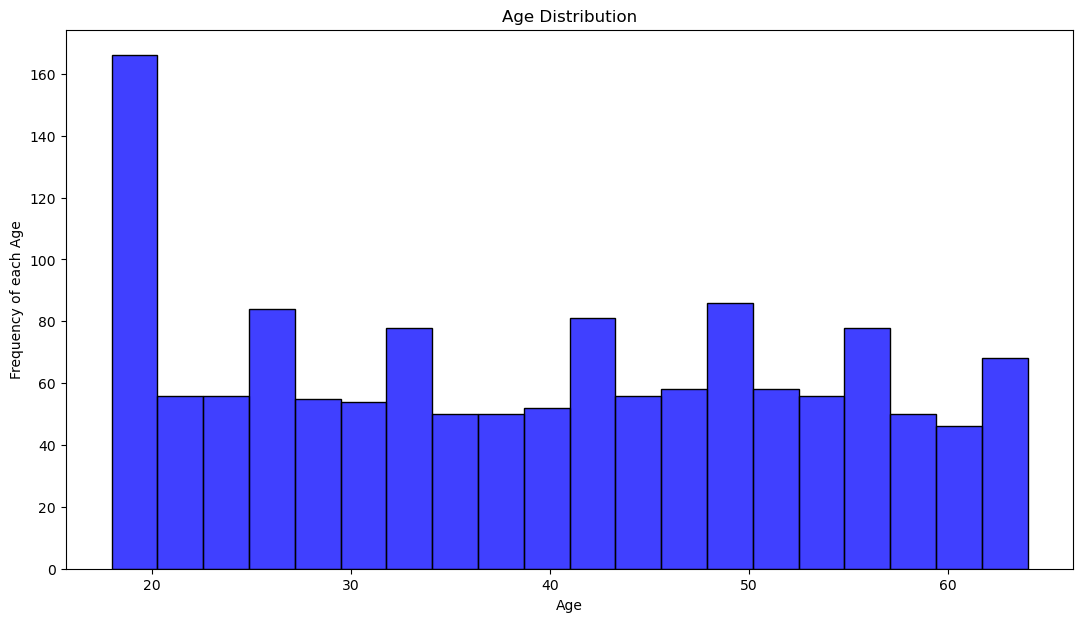

In [6]:
# Checking Age Distribution

plt.figure(figsize=(13,7))
sns.histplot(data.age,bins = 20, kde = False, color = 'blue')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each Age')
plt.show()

### ***Maximum People in a dataset are below the age of 20.***

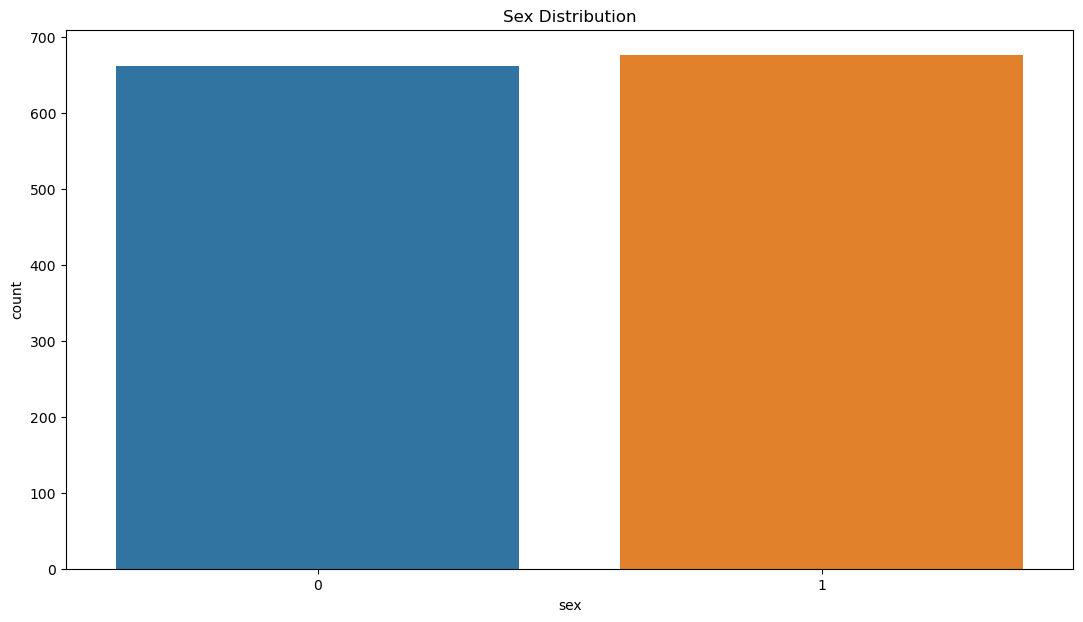

In [7]:
# Checking Sex Distribution

plt.figure(figsize = (13,7))
sns.countplot(x = 'sex', data = data)
plt.title('Sex Distribution')
plt.show()

### ***From the above graph we can derive that the number of Males and Females in the Dataset are almost equal.***

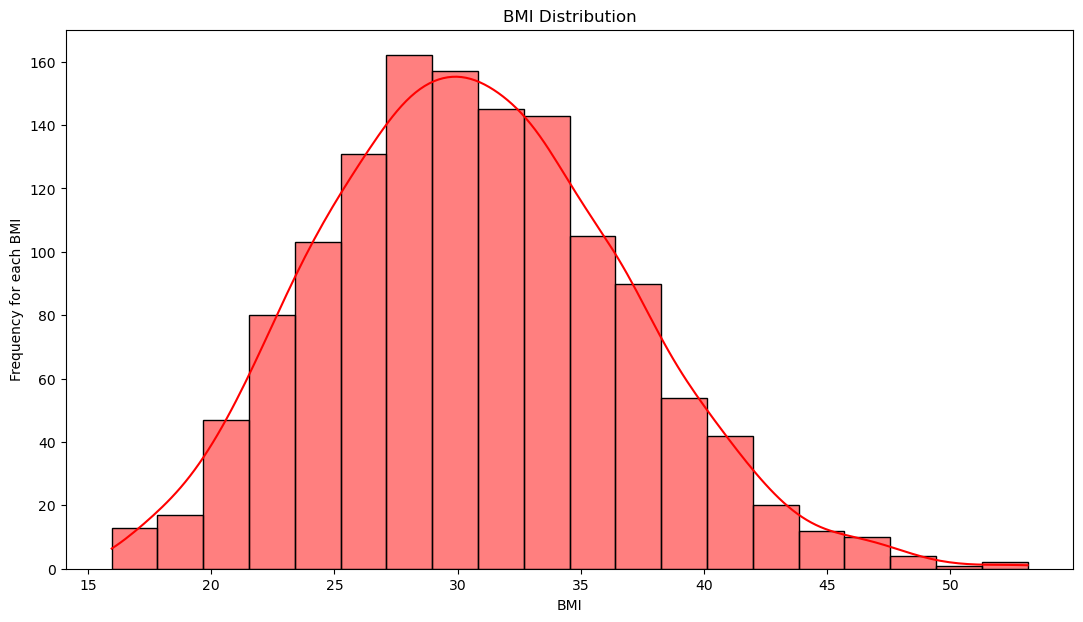

In [8]:
# Checking BMI Distribution

plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins = 20, kde = True, color = 'red')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency for each BMI')
plt.show()

In [9]:
bmi_mean = np.mean(data['bmi'])
bmi_std = np.std(data['bmi'])
print('Mean_BMI:',round(bmi_mean,2))
print('Std_BMI:',round(bmi_std,2))

Mean_BMI: 30.66
Std_BMI: 6.1


### ***The majority of the people have BMI between 25 and 40, which is considered as overweight and could be a major factor in increasing the medical cost .***

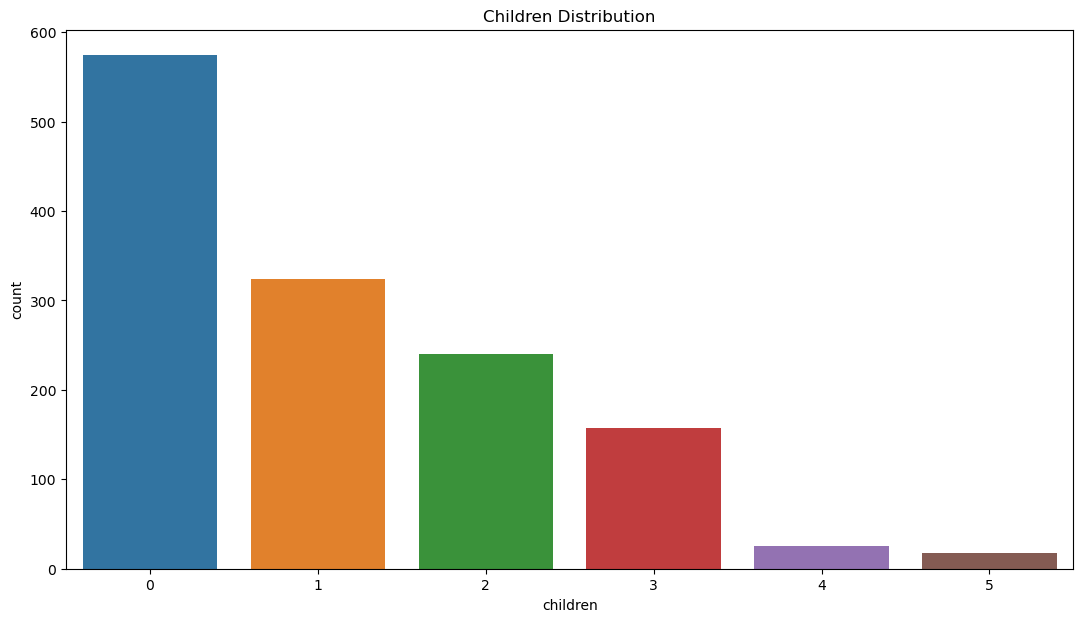

In [10]:
# Checking Children Distribution

plt.figure(figsize = (13,7))
sns.countplot(x = 'children', data = data)
plt.title('Children Distribution')
plt.show()

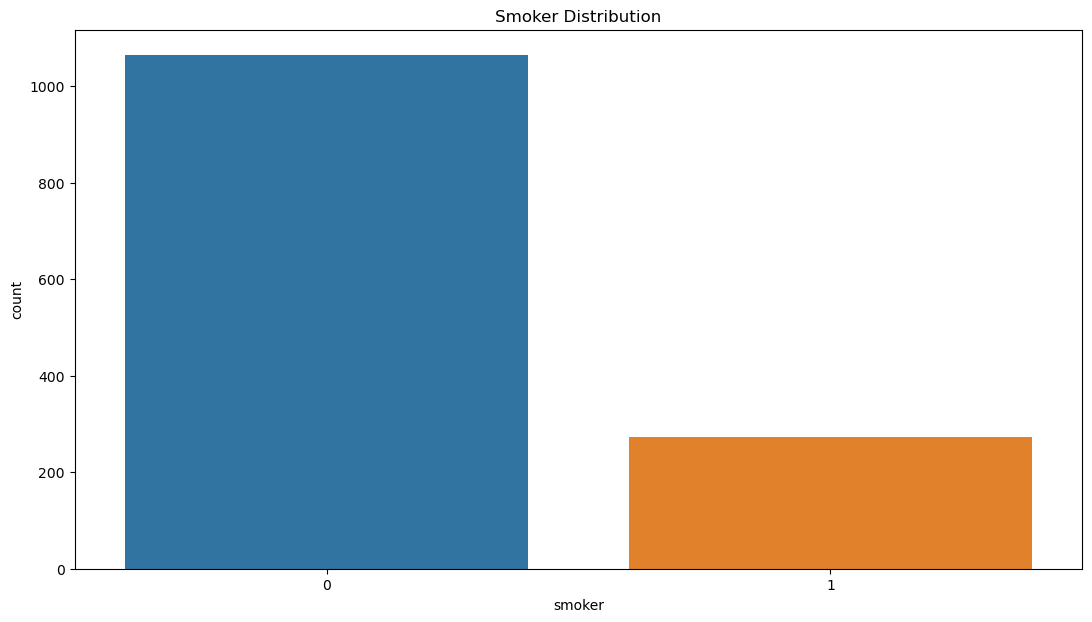

In [11]:
# Checking Smoker Distribution

plt.figure(figsize = (13,7))
sns.countplot(x = 'smoker', data = data)
plt.title('Smoker Distribution')
plt.show()

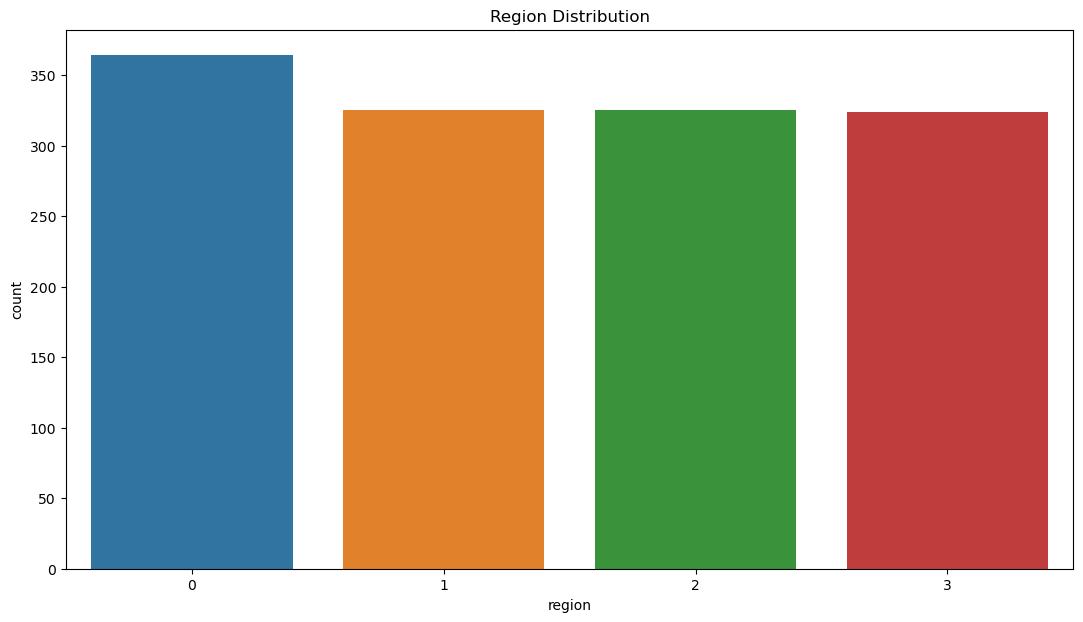

In [12]:
# Checking Region Distribution

plt.figure(figsize = (13,7))
sns.countplot(x = 'region', data = data)
plt.title('Region Distribution')
plt.show()

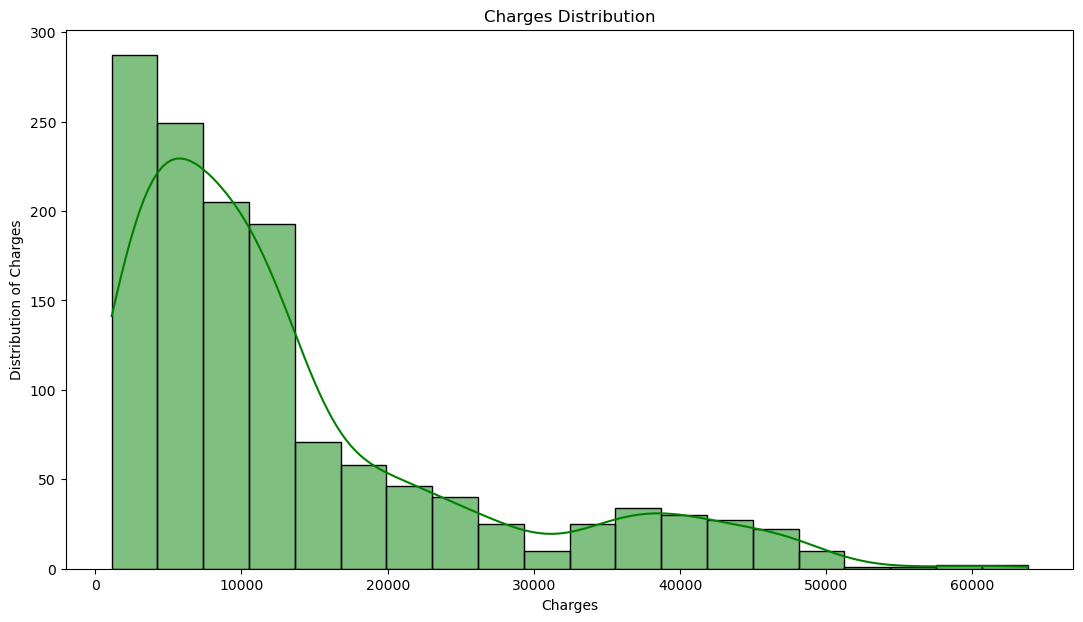

In [13]:
# Checking Charges Distribution

plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins = 20, kde = True, color = 'green')

plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Distribution of Charges')
plt.show()

### ***Maximum people in the dataset are paying approx [1k - 13k] for their Medical insurance and the number of patients are negligible having medical charges above 50k.***

### Bi-Variate Analysis: - Whenever we have 2 variables for analysing.

<Figure size 1300x700 with 0 Axes>

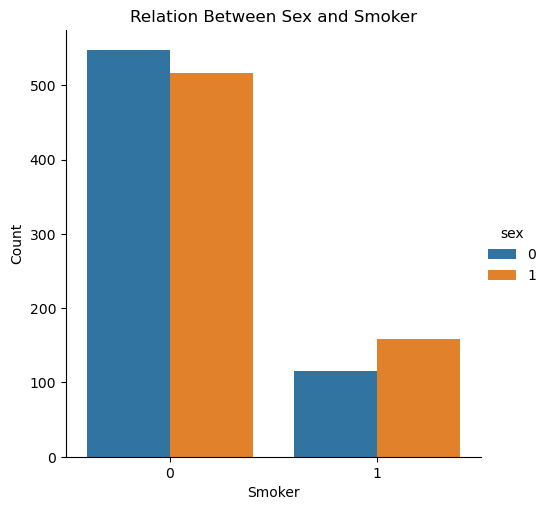

In [14]:
# Relation between Sex and Smoker

plt.figure(figsize = (13,7))
sns.catplot(x = 'smoker', kind = 'count', hue = 'sex', data = data)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Relation Between Sex and Smoker')
plt.show()

### ***We can observer that the number of Male Smokers are more in number as compared to Female Smokers. So, we can assume that cost of medical insurance for Males would be more than that of Females.***

<Axes: title={'center': 'Box plot for charges of Females.'}, xlabel='charges', ylabel='smoker'>

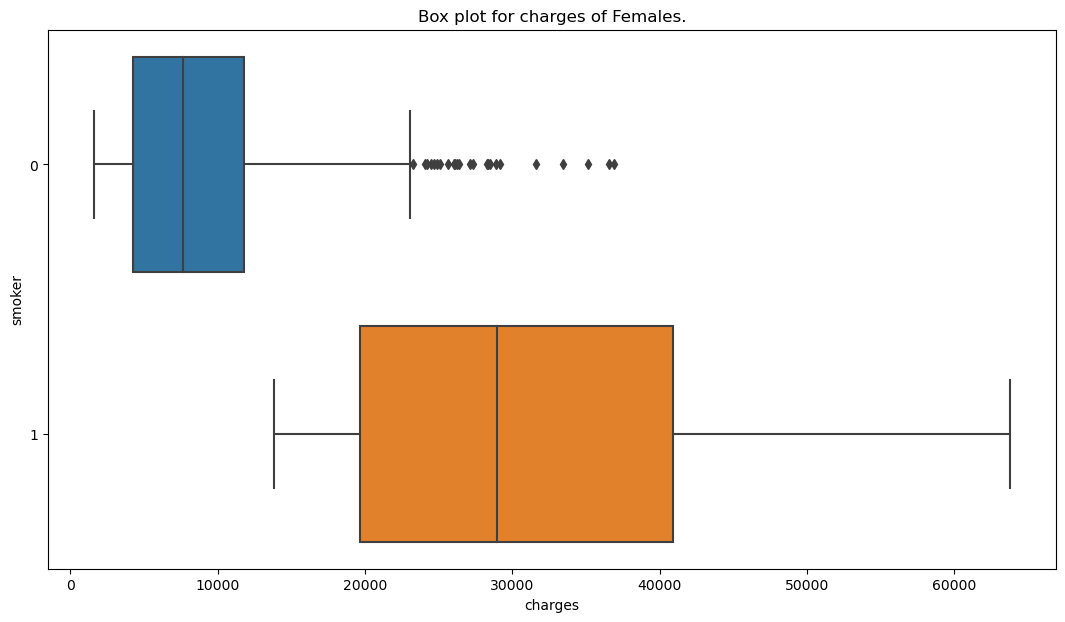

In [15]:
# Relation between Females and Charges

plt.figure(figsize = (13,7))
plt.title('Box plot for charges of Females.')
sns.boxplot(y='smoker', x = 'charges', data = data[(data.sex == 0)],orient = 'h')

<Axes: title={'center': 'Box plot for charges of Males.'}, xlabel='charges', ylabel='smoker'>

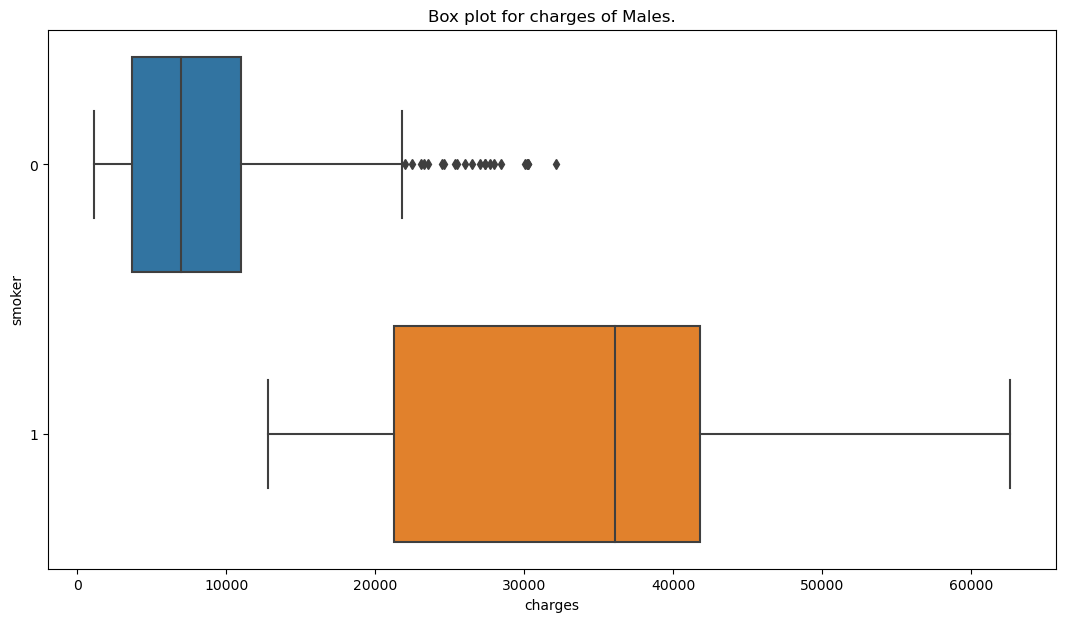

In [16]:
# Relation between Males and Charges

plt.figure(figsize = (13,7))
plt.title('Box plot for charges of Males.')
sns.boxplot(y='smoker', x = 'charges', data = data[(data.sex == 1)],orient = 'h')

### ***The above assumption holds True, that the cost of  medical insurance for Males will be more than that of  Females. In addition to that medical expenses of smokers is greater than that of non smokers.***

<Axes: >

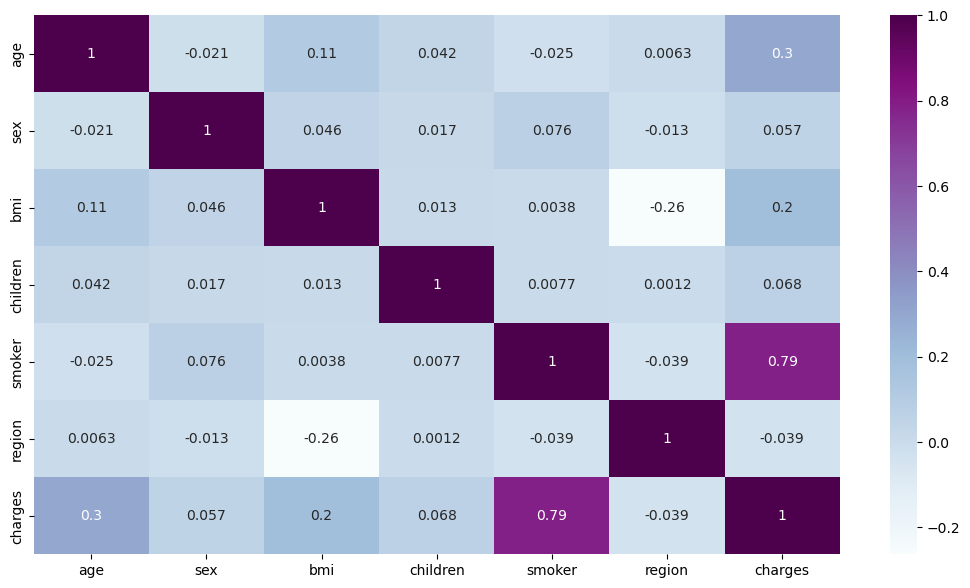

In [17]:
cor = data.corr()
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'BuPu')

### ***From above plot we can state that smokers have more medical expenses, So it has a high impact on the cost of medical insurance followed by Age and BMI whereas Region, Sex and Children has no impact.***

<Figure size 1300x700 with 0 Axes>

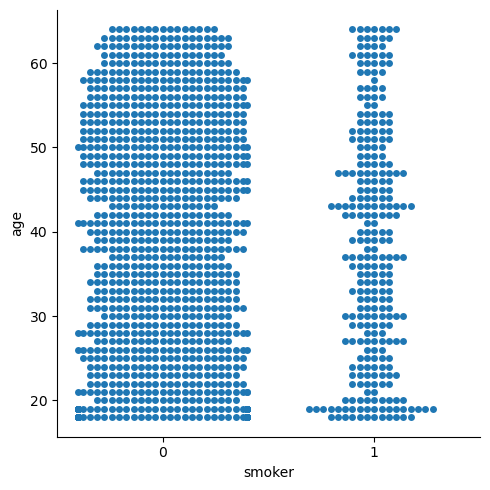

In [18]:
# Relation between Age and Smokers

plt.figure(figsize = (13,7))
sns.catplot(x = 'smoker', y = 'age', kind = 'swarm', data = data)

### ***From above plot we can see that maximum smokers are from below the Age of 20.***


### Multi-Variate Analysis:- Whenever we have more than 2 variables for analysing.

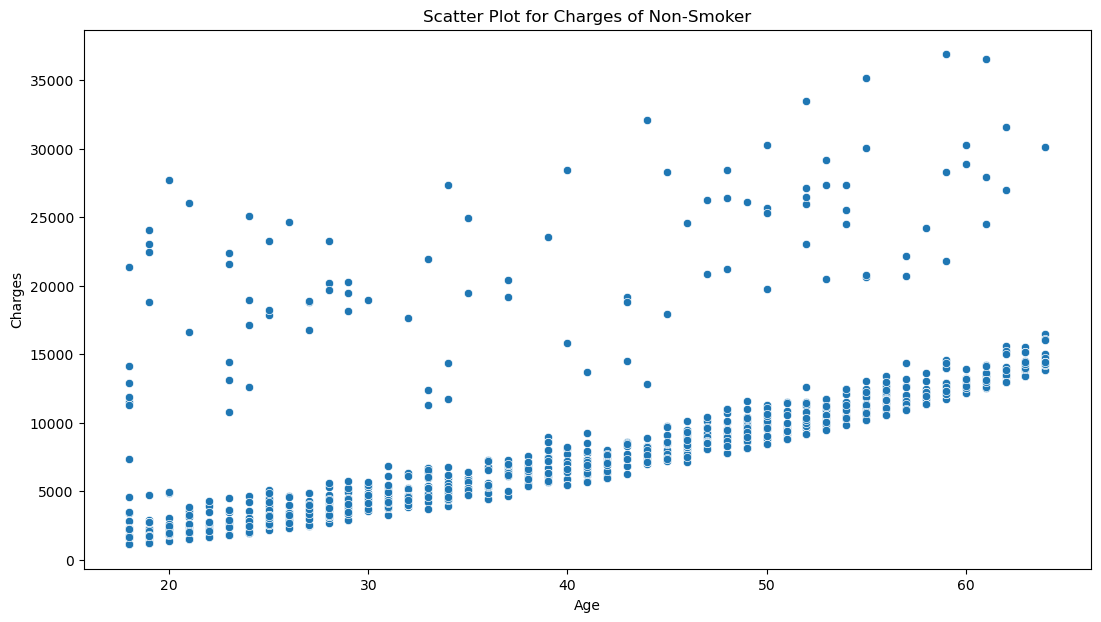

In [19]:
# Relation between Age and Charges for Non-Smokers

plt.figure(figsize = (13,7))
sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 0)])
plt.title('Scatter Plot for Charges of Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### ***Majority of the points shows that medical expenses increases with the age which may be due to the fact that older people are more prone to illness. But there are some outliers which show other illness or expenses which may lead to increase in medical expenses.***

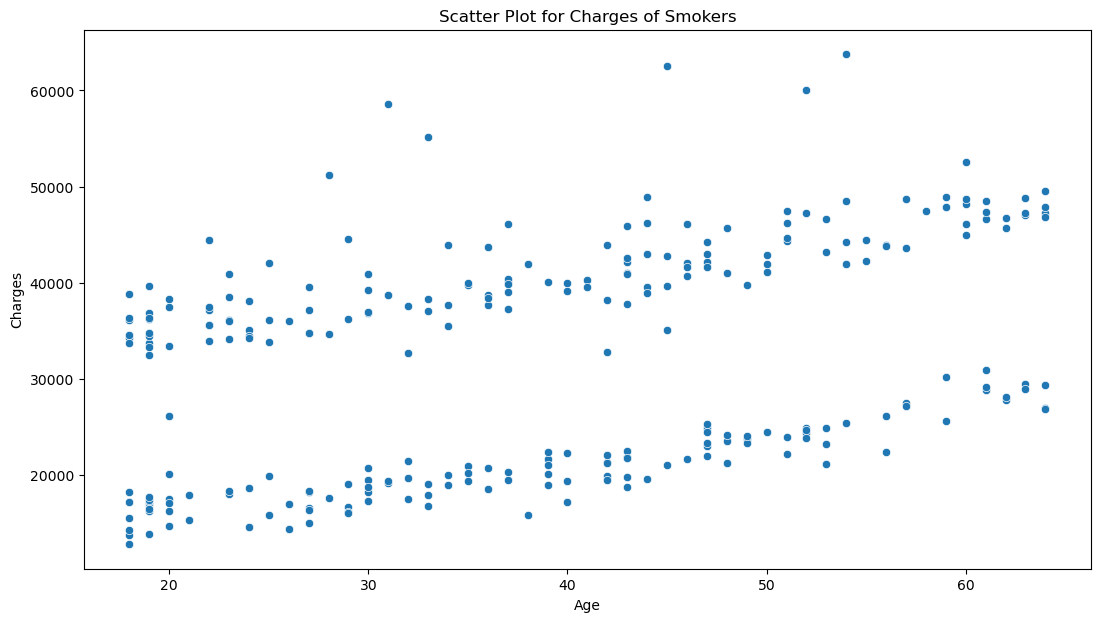

In [20]:
# Relation between Age and Charges for Smokers

plt.figure(figsize = (13,7))
sns.scatterplot(x = 'age', y = 'charges', data = data[(data.smoker == 1)])
plt.title('Scatter Plot for Charges of Smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### ***In this graph there are two segments, one with high medical expenses which may be due to the reason of smoking related illness and other with low medical expenses which may be due to the age related illness.***

***Now, In order to get more clear insights we can combine both the graphs.***

<Figure size 1300x700 with 0 Axes>

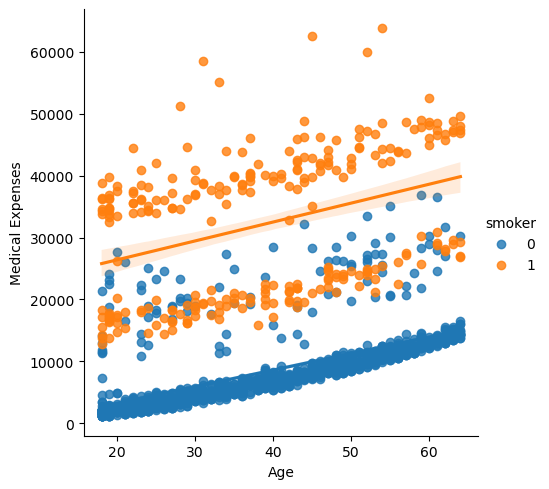

In [21]:
# Relation between age and charges for both Smoker and Non-Smoker

plt.figure(figsize = (13,7))
sns.lmplot(x = 'age', y = 'charges', data = data, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expenses')
plt.show()

***Now, we can clearly understand the variation in charges with respect to age and smoking habits. The medical expenses of smokers are higher than that of Non-Smokers irrespective of age. In Non-Smokers, The cost of treatment increses with age which is obvious.***

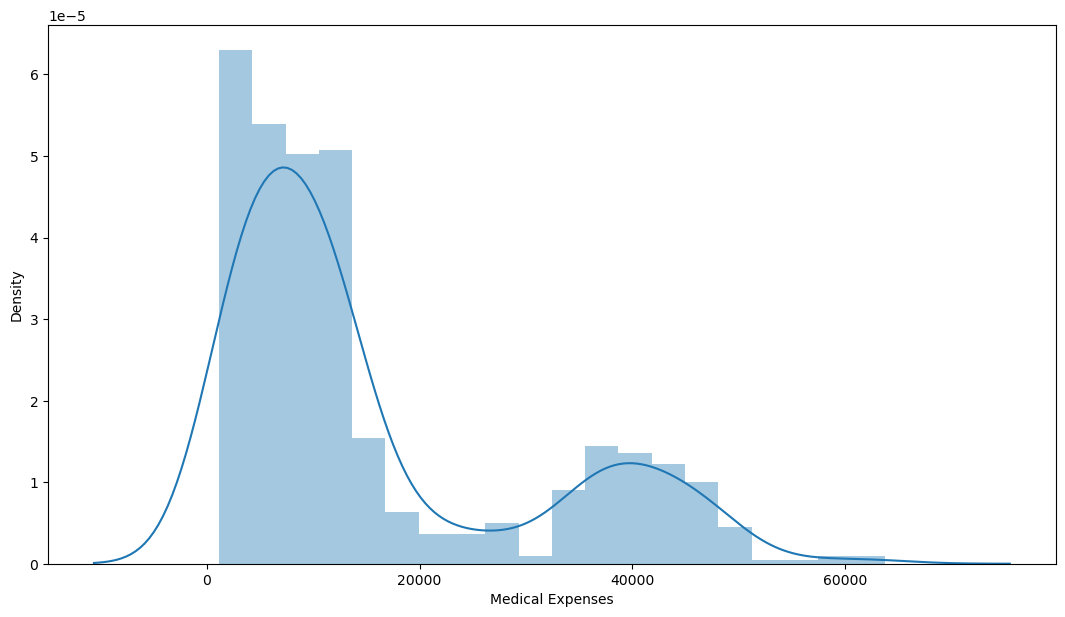

In [22]:
# Relation between BMI and charges for both Smoker and Non-Smoker

plt.figure(figsize = (13,7))
sns.distplot(data[(data.bmi > 30)]['charges'])
plt.xlabel('Medical Expenses')
plt.show()

***Therefore, People with BMI less than 30 are spending less where as people with BMI more than 30 are spending more on medical Expenses.***

### Feature Selection

In [23]:
# Droping irrelevent cols

data.drop('region', axis = 1, inplace = True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## Model Building and Evaluation -

In [24]:
x = data.drop('charges', axis = 1)
y = data.charges

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 2)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 5), (335, 5), (1003,), (335,))

In [27]:
# Linear Regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
# Making Predition

y_pred = reg.predict(x_test)

In [29]:
# Model Evaluation


from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test, y_pred))

MAE: 4180.786422973237
RMSE: 6159.554567242218
R2 Score: 0.7486163979240839


## Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
poly_reg

PolynomialFeatures()

In [31]:
# Transforming the features to higher degree

x_train_poly = poly_reg.fit_transform(x_train)

# Splitting the Data
x_train, x_test,y_train,y_test = train_test_split(x_train_poly,y_train,test_size = 0.2, random_state = 2)

In [32]:
# Train the model
plr = LinearRegression()
plr.fit(x_train,y_train)

LinearRegression()

In [33]:
# Making Predictioin

y_pred_plr = plr.predict(x_test)

In [34]:
# Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))
print('R2 Score:',metrics.r2_score(y_test, y_pred_plr))

MAE: 2830.3497831863097
RMSE: 4686.566126932503
R2 Score: 0.8404302519772902


***Result: My Model is able to explain 84% of the total data set.***

### Making Real Time Prediction System

In [35]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [36]:
# Input Values

age = 21
sex = 1
bmi = 27
children = 0
smoker = 1

In [37]:
# Predicting the Charges

charge = reg.predict([[age,sex,bmi,children,smoker]])
print('The charges of this new patient is $',charge)

The charges of this new patient is $ [25746.78028379]
